In [10]:
import pandas as pd
import matplotlib.pyplot as plt


df= pd.read_csv('training_metrics.csv')
# df = pd.DataFrame(rows)
# return df.sort_values('Global_Epoch').reset_index(drop=True)
df.head()



,Reported_Epoch,Loss_DV,Loss_DS,Loss_adv_vocal,Loss_adv_speech,Loss_Cycle_Vocal,Loss_Cycle_Speech,Loss_Identity_Vocal,Loss_Identity_Speech,Grad_Norm_DV,Grad_Norm_DS,Grad_Norm_GV,Grad_Norm_GS,num_DV_updates,num_DS_updates,Global_Epoch
0,1,0.7512,0.7336,0.1735,0.1649,23.5501,26.3075,30.0653,29.2166,0.7523,0.9174,0.0065,0.0046,15.0,14.0,1
1,2,0.7515,0.5876,0.1154,0.1992,9.1575,10.5017,15.4101,14.6025,0.3659,0.0000,0.0060,0.0075,15.0,0.0,2
2,3,0.7417,0.6545,0.1087,0.1538,7.3917,8.8523,10.1300,11.9215,0.1464,1.3821,0.0035,0.0041,16.0,7.0,3
3,4,0.7379,0.7572,0.1093,0.0862,6.5361,8.5947,7.6687,10.6504,0.1896,0.2796,0.0022,0.0019,16.0,18.0,4
4,5,0.7327,0.6357,0.1095,0.1449,6.0047,8.3001,7.1417,9.9419,0.1899,0.3473,0.0032,0.0041,16.0,11.0,5


In [11]:
# Hardcode notebook name
# NOTEBOOK_FILENAME = "cycle_GAN_train4.ipynb"
# EPOCHS_PER_CYCLE = 50

# # 1. Extract all text outputs from the notebook
# text = extract_text_from_ipynb(NOTEBOOK_FILENAME)

# # 2. Parse metrics from the extracted text
# df = parse_metrics_from_text(text, epochs_per_cycle=EPOCHS_PER_CYCLE)
# print("\nParsed metrics (first 10 rows):")
# print(df.head(10).to_string(index=False))
# print(df.shape)




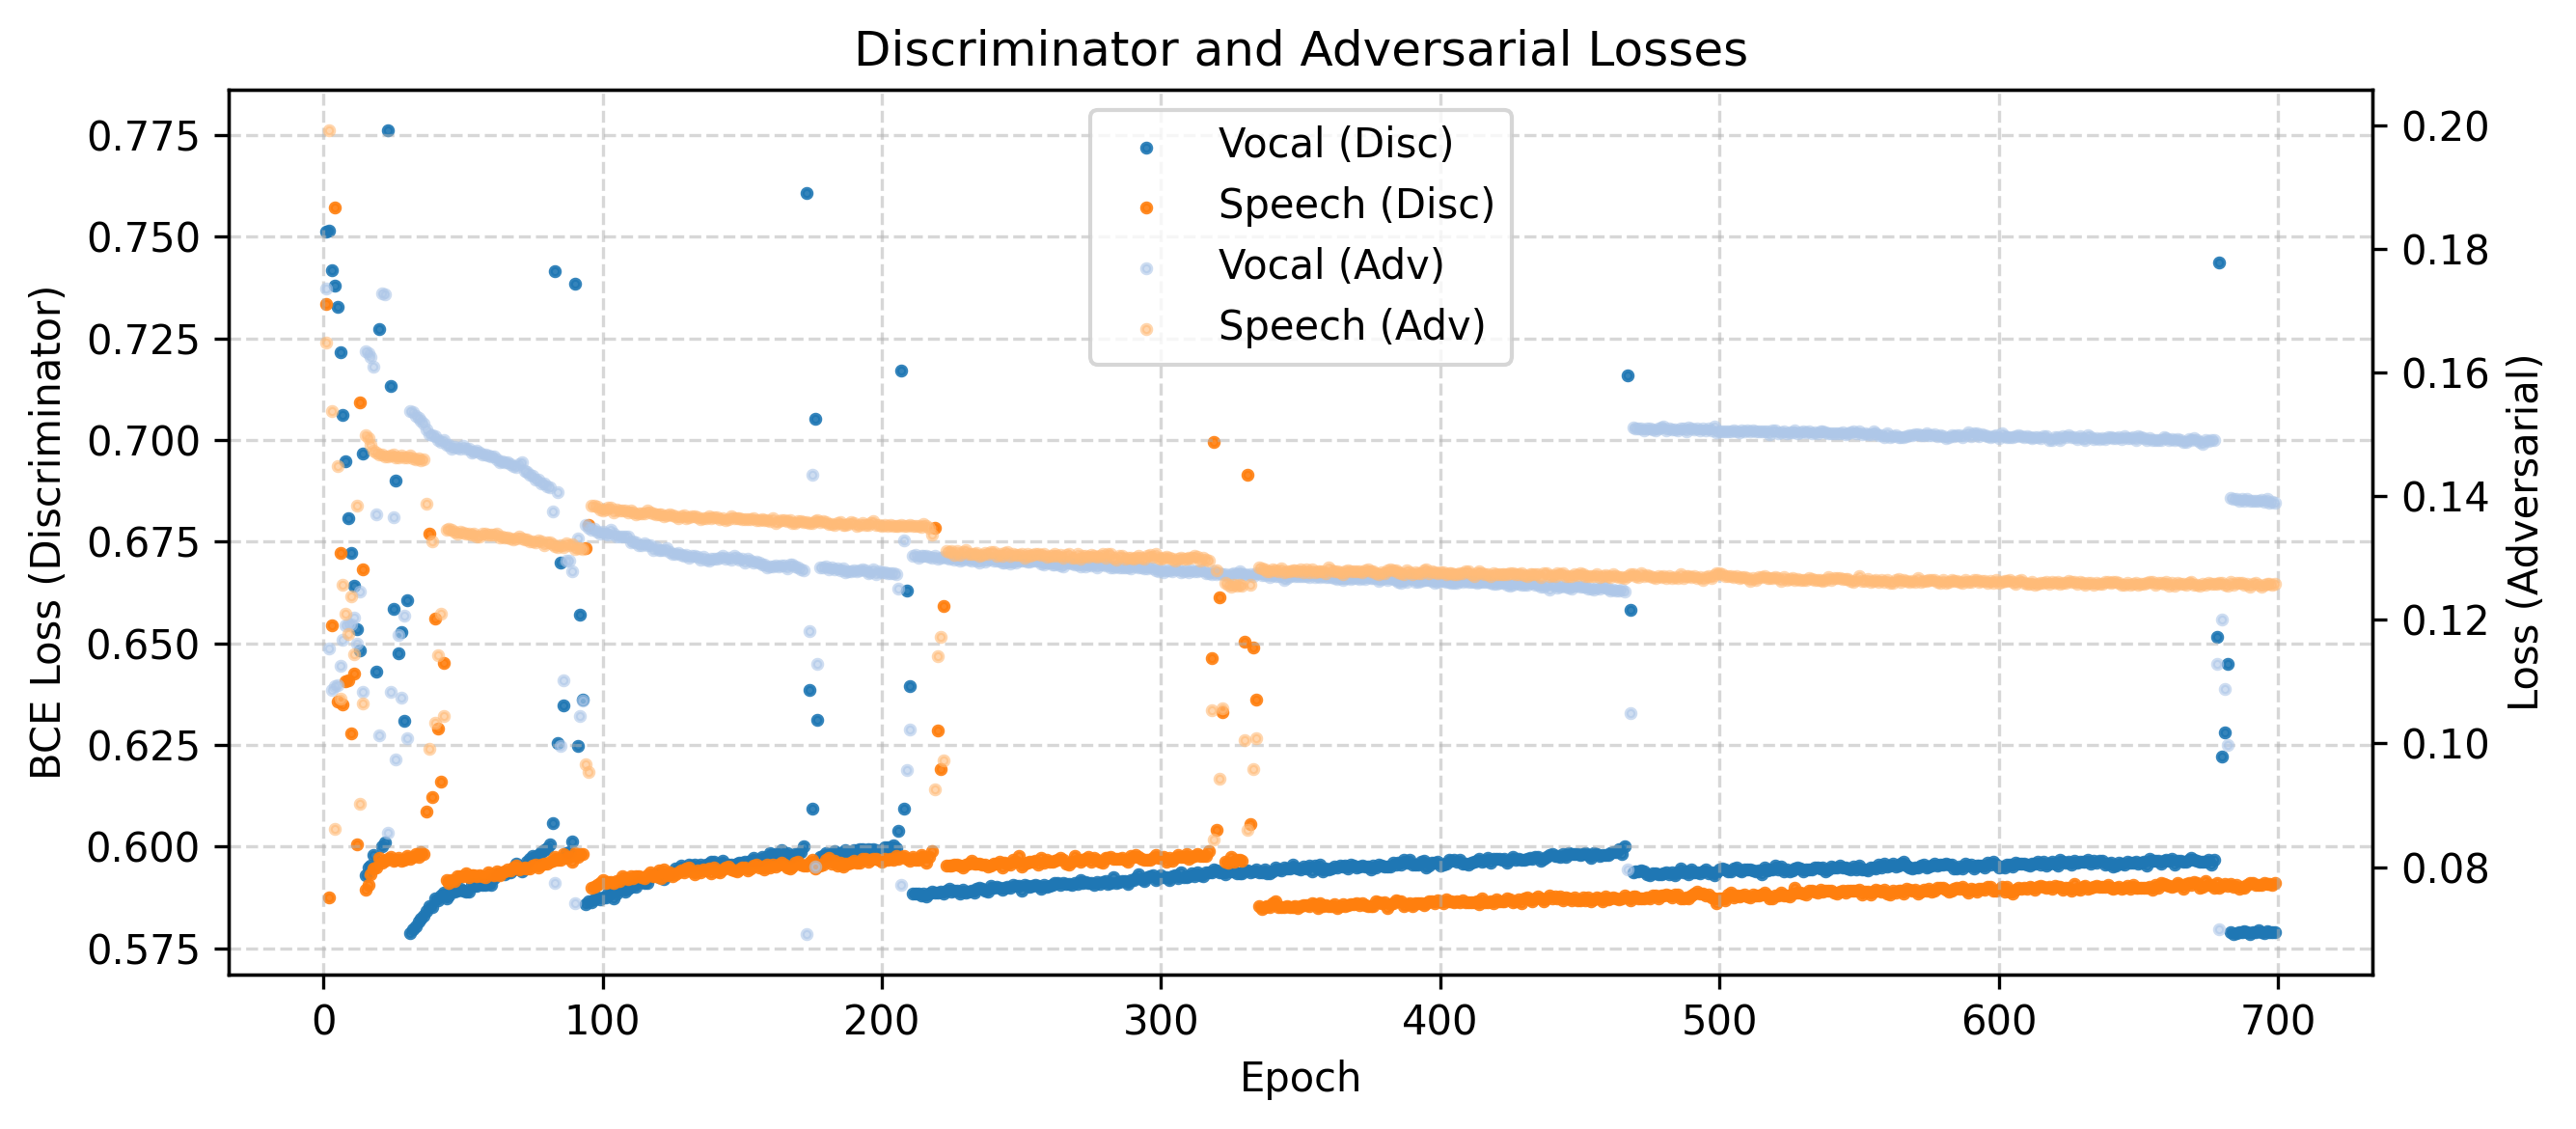

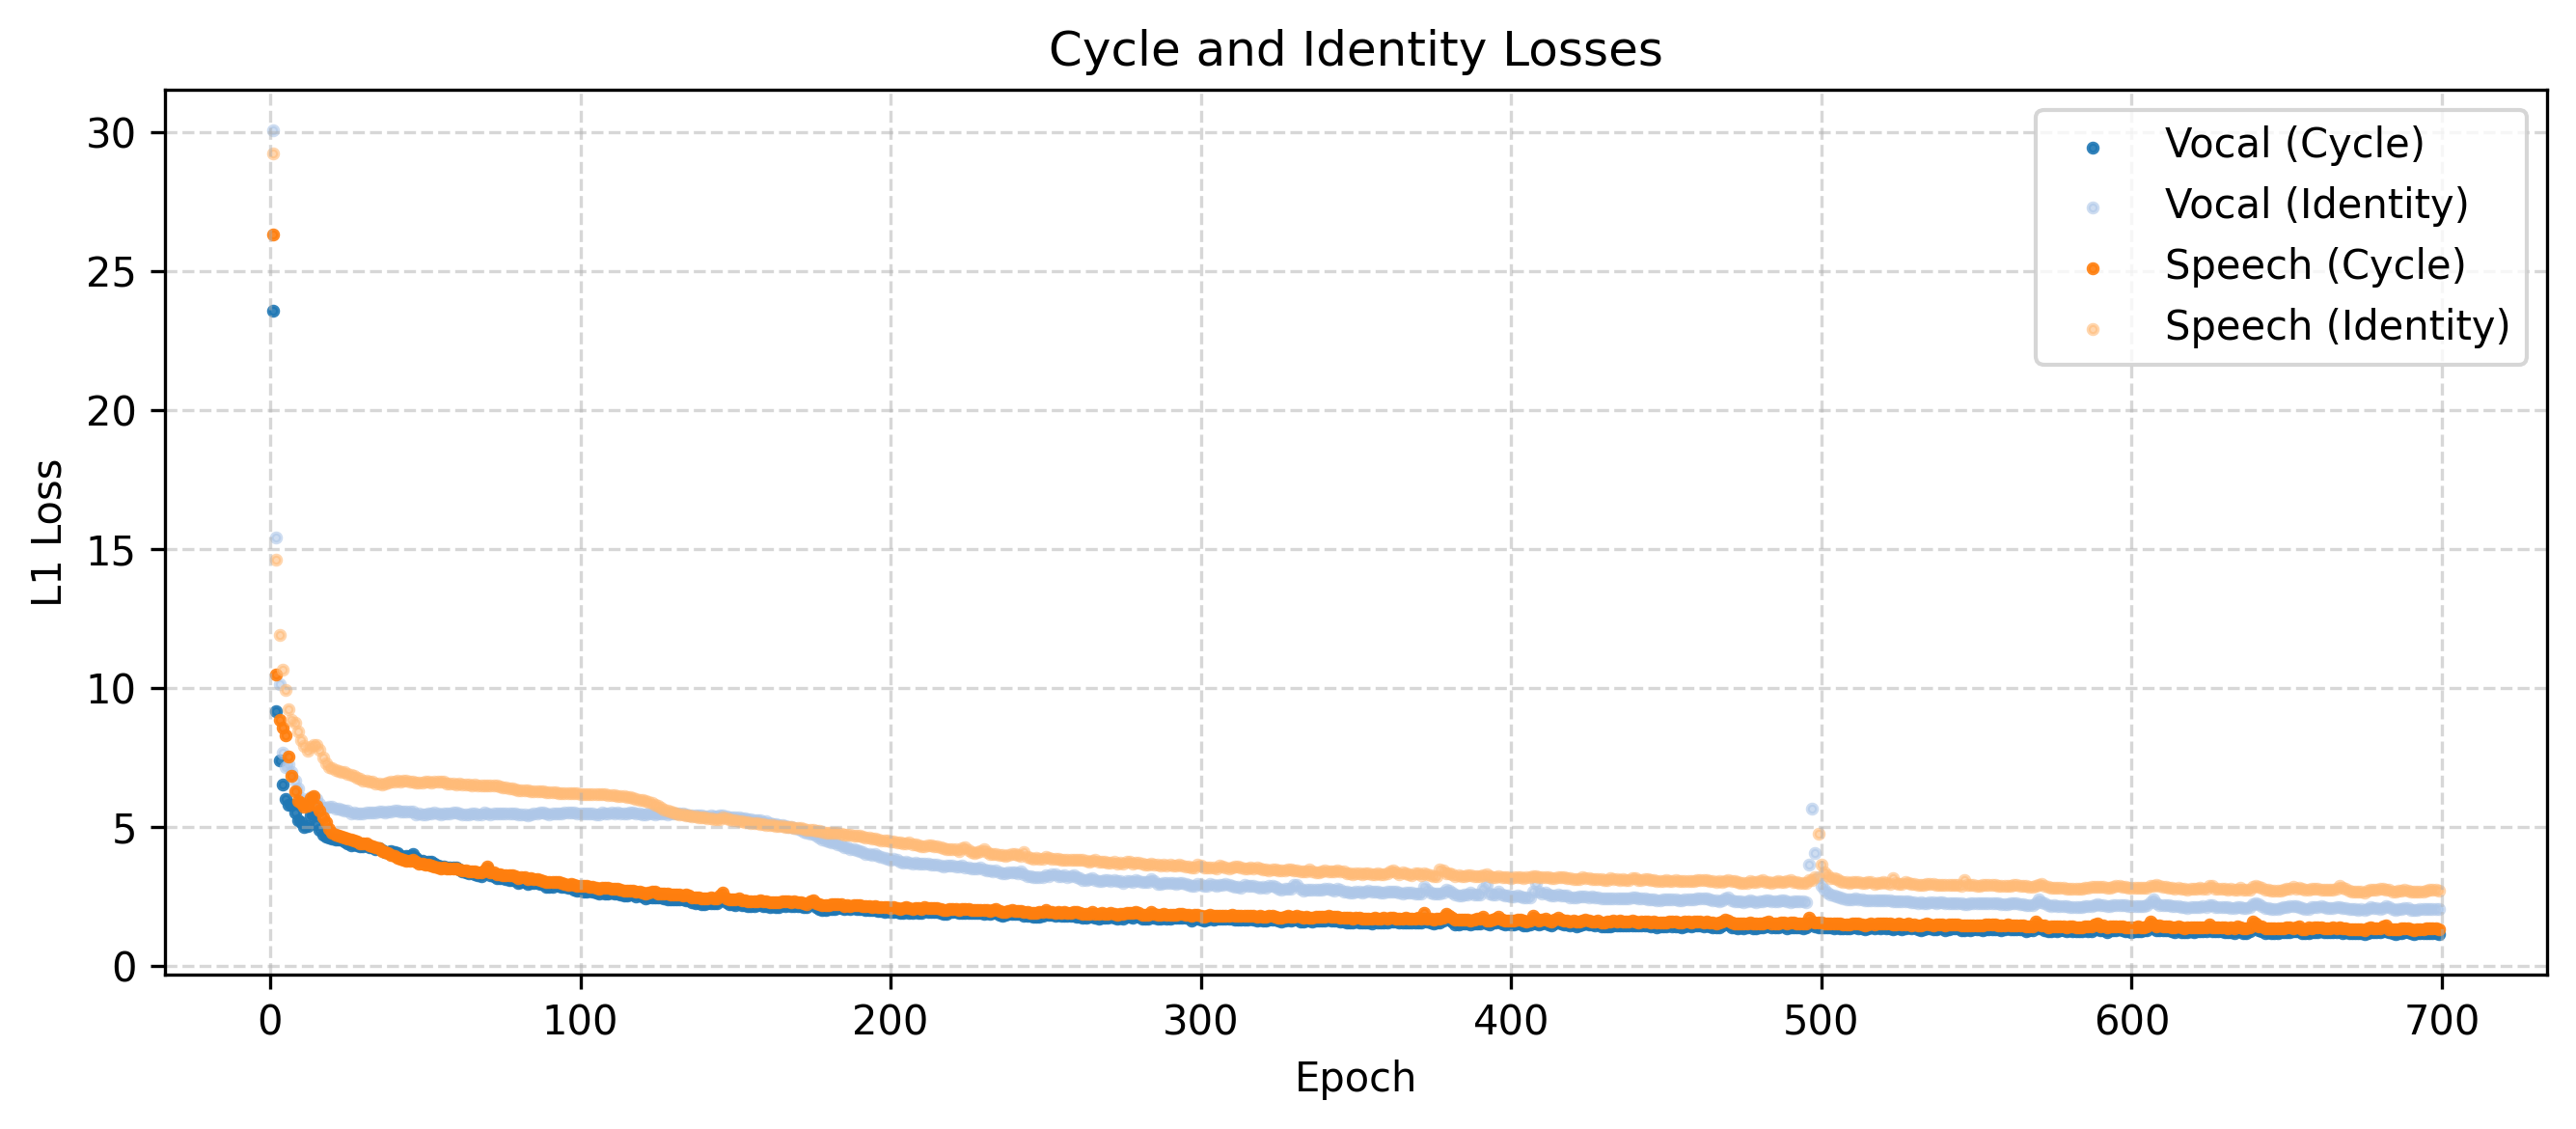

In [12]:
marker_size = 20

def plot_discriminator_adversarial(df):
    """Dual-axis plot: Discriminator Loss vs Adversarial Loss"""
    marker_size_main = marker_size
    marker_size_pale = marker_size
    dpi = 300
    alpha_main = 0.9
    alpha_pale = 0.6

    colors = {
        'Vocal': '#1f77b4',   # vivid blue
        'Speech': '#ff7f0e',  # vivid orange
    }
    pale_colors = {
        'Vocal': '#aec7e8',   # pale blue
        'Speech': '#ffbb78',  # pale orange
    }

    fig, ax1 = plt.subplots(figsize=(9, 4), dpi=dpi)
    ax2 = ax1.twinx()

    for label in ['Vocal', 'Speech']:
        ax1.scatter(df['Global_Epoch'], df[f'Loss_D{"V" if label=="Vocal" else "S"}'], 
                    label=f'{label} (Disc)', color=colors[label], s=marker_size_main, marker='.', alpha=alpha_main)
        ax2.scatter(df['Global_Epoch'], df[f'Loss_adv_{label.lower()}'], 
                    label=f'{label} (Adv)', color=pale_colors[label], s=marker_size_pale, marker='.', alpha=alpha_pale)

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("BCE Loss (Discriminator)")
    ax2.set_ylabel("Loss (Adversarial)")
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Combine legends
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper center')
    # ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2)


    plt.title("Discriminator and Adversarial Losses")
    plt.tight_layout()
  
    plt.savefig("disc_adv_losses.png", dpi=dpi, bbox_inches='tight', transparent=False)
    plt.show()


def plot_cycle_identity(df):
    """Single-axis plot: Cycle Loss and Identity Loss, using the same colors as the discriminator plot."""
    marker_size_cycle = marker_size
    marker_size_identity = marker_size
    alpha_cycle = 0.9
    alpha_identity = 0.6
    dpi = 300

    # Same colors as in the other plot
    vivid_colors = {
        'Vocal': '#1f77b4',   # vivid blue
        'Speech': '#ff7f0e',  # vivid orange
    }
    pale_colors = {
        'Vocal': '#aec7e8',   # pale blue
        'Speech': '#ffbb78',  # pale orange
    }

    fig, ax = plt.subplots(figsize=(9, 4), dpi=dpi)

    for label in ['Vocal', 'Speech']:
        ax.scatter(df['Global_Epoch'], df[f'Loss_Cycle_{label}'],
                   label=f'{label} (Cycle)', color=vivid_colors[label],
                   s=marker_size_cycle, marker='.', alpha=alpha_cycle)
        ax.scatter(df['Global_Epoch'], df[f'Loss_Identity_{label}'],
                   label=f'{label} (Identity)', color=pale_colors[label],
                   s=marker_size_identity, marker='.', alpha=alpha_identity)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("L1 Loss")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right')
    plt.title("Cycle and Identity Losses")
    plt.tight_layout()
    
    plt.savefig("cycle_identity_losses.png", dpi=dpi, bbox_inches='tight', transparent=False)
    plt.show()


plot_discriminator_adversarial(df)
plot_cycle_identity(df)
